In [1]:
import wordcloud

In [2]:
!pip install wordcloud

In [3]:
import wordcloud
import folium
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from folium import plugins

In [4]:
wordcloud.__version__

'1.8.0'

In [5]:
alice_text = open("alice_novel.txt", "r").read()

In [6]:
print(alice_text[1000:1500])

s or
conversation?'

So she was considering in her own mind (as well as she could, for the
hot day made her feel very sleepy and stupid), whether the pleasure
of making a daisy-chain would be worth the trouble of getting up and
picking the daisies, when suddenly a White Rabbit with pink eyes ran
close by her.

There was nothing so VERY remarkable in that; nor did Alice think it so
VERY much out of the way to hear the Rabbit say to itself, 'Oh dear!
Oh dear! I shall be late!' (when she thought it


In [7]:
en_stopwords = wordcloud.STOPWORDS

In [8]:
word_cloud = wordcloud.WordCloud(
    background_color="white",
    max_words=2000,
    stopwords=en_stopwords
)

In [9]:
word_cloud.generate(alice_text)

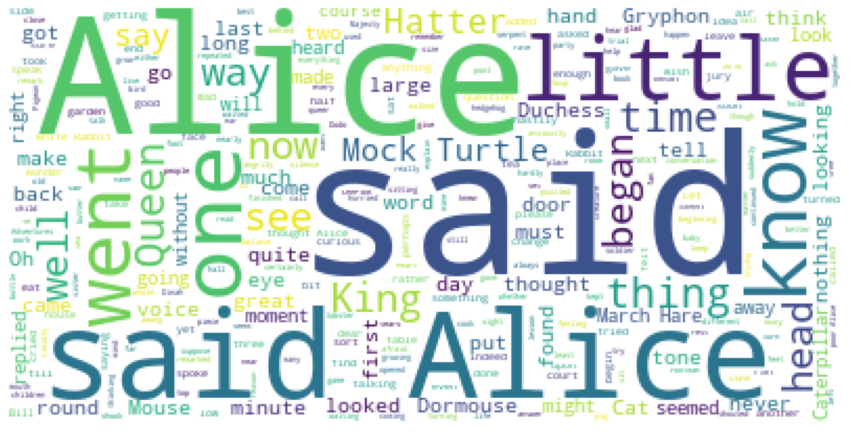

In [10]:
plt.figure(figsize=[15, 8])
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

In [11]:
en_stopwords.add("said")

word_cloud.generate(alice_text)

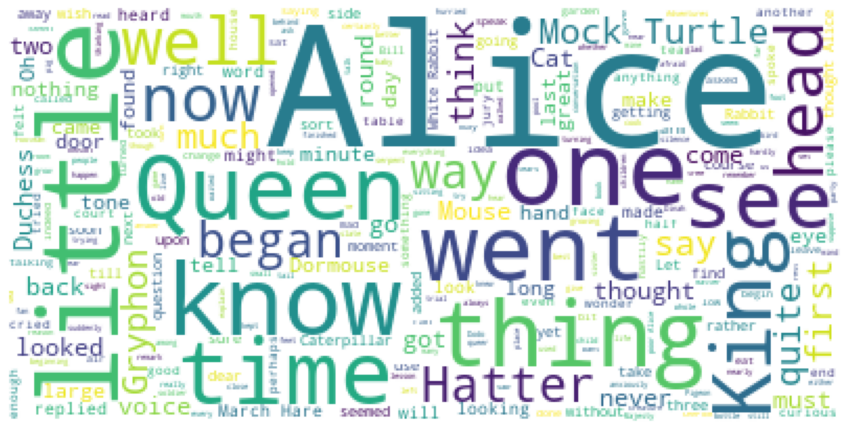

In [12]:
plt.figure(figsize=[15, 8])
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

In [13]:
alice_img = Image.open("./alice_mask.png")
alice_mask = np.array(alice_img)

In [14]:
alice_mask.shape

(900, 900)

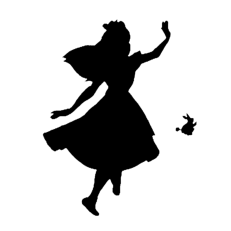

In [15]:
plt.imshow(alice_mask, cmap=plt.cm.gray)
plt.axis("off")
plt.show()

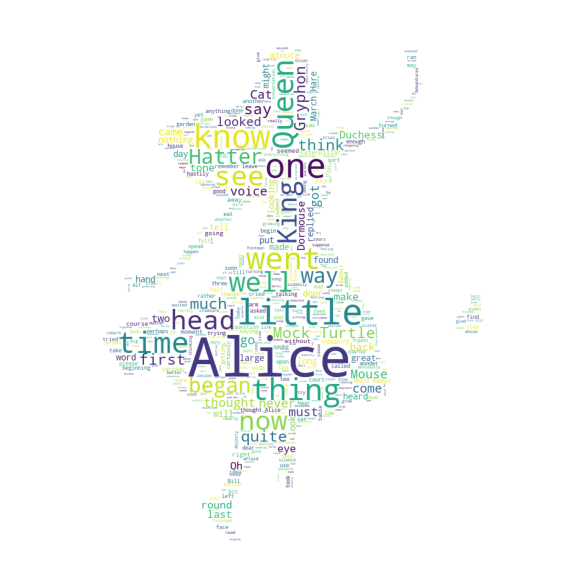

In [16]:
alice_wc = wordcloud.WordCloud(
    background_color="white",
    max_words=3000,
    mask=alice_mask,
    stopwords=en_stopwords
)
alice_wc.generate(alice_text)

plt.figure(figsize=[10, 15])
plt.imshow(alice_wc)
plt.axis("off")
plt.show()

In [17]:
df_canada = pd.read_excel('https://github.com/ardhiraka/PFDS_sources/blob/master/Canada.xlsx?raw=true',
                       sheet_name="Canada by Citizenship",
                       skiprows=range(20),
                       skipfooter=2
)

In [18]:
df_canada

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59


In [19]:
df_canada["total"] = df_canada.sum(axis=1)
df_canada.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,65977
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1223,856,702,560,716,561,539,620,603,18433
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,72156
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,1,0,0,0,0,0,0,0,2774
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,1,1,0,0,0,0,1,1,2749


In [20]:
max_words = 100
text = ""
for country in df_canada.OdName.values:
    if len(country.split(" ")) ==1:
        repeat_num_times = int(round(
            df_canada.loc[
                df_canada["OdName"]==country,
                "total"
            ] / float(df_canada['total'].sum()) * max_words
        ))
        text = text + ((country + ' ') * repeat_num_times)

In [21]:
text

'Afghanistan Algeria Bangladesh China China China China China China China China China Colombia Egypt Ethiopia France France Germany Guyana Haiti India India India India India India India India India India Iraq Israel Jamaica Jamaica Jordan Lebanon Lebanon Mexico Morocco Nigeria Pakistan Pakistan Pakistan Pakistan Peru Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Poland Portugal Romania Somalia Ukraine '

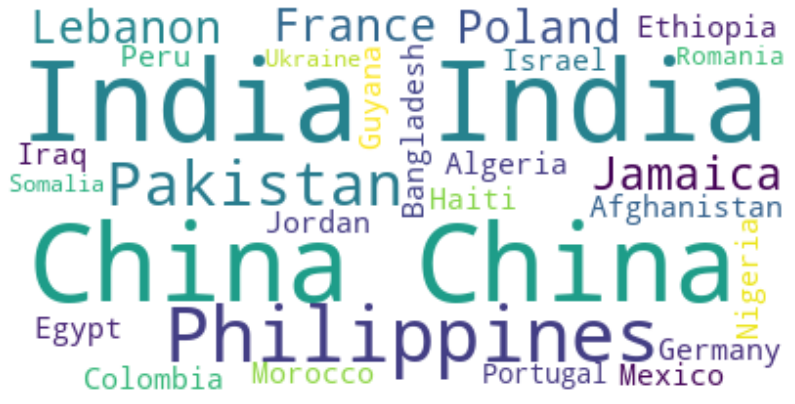

In [22]:
immigrant_wc = wordcloud.WordCloud(background_color="white").generate(text)
plt.figure(figsize=(14, 9))
plt.imshow(immigrant_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [23]:
years = list(range(1980, 2014))
df_total = pd.DataFrame(df_canada[years].sum(axis=0))
df_total= df_total.reset_index()
df_total.columns = ["year", "total"]
df_total.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


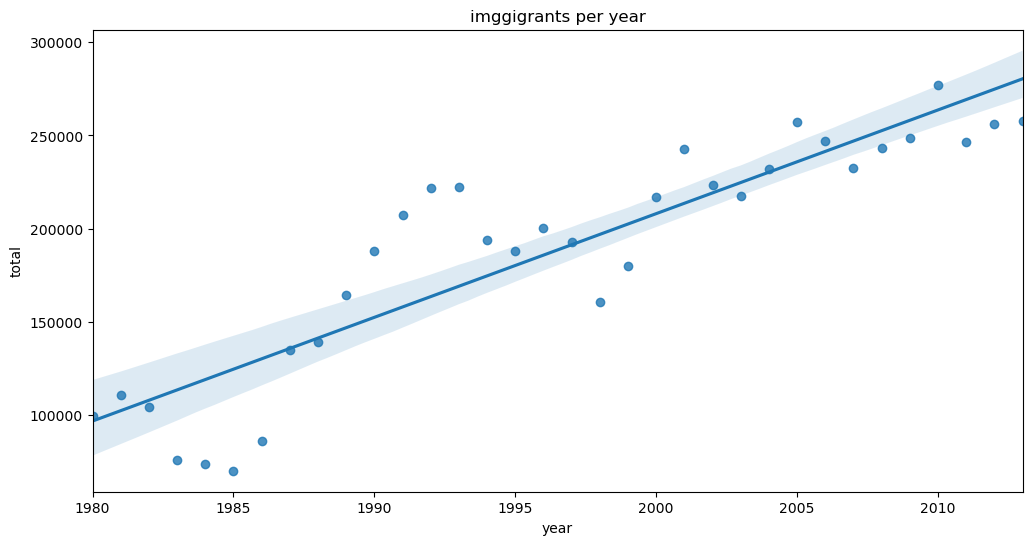

In [24]:
plt.style.use("default")
plt.figure(figsize=(12, 6))
sns.regplot(x="year", y="total", data=df_total)
plt.title("imggigrants per year")
plt.show()

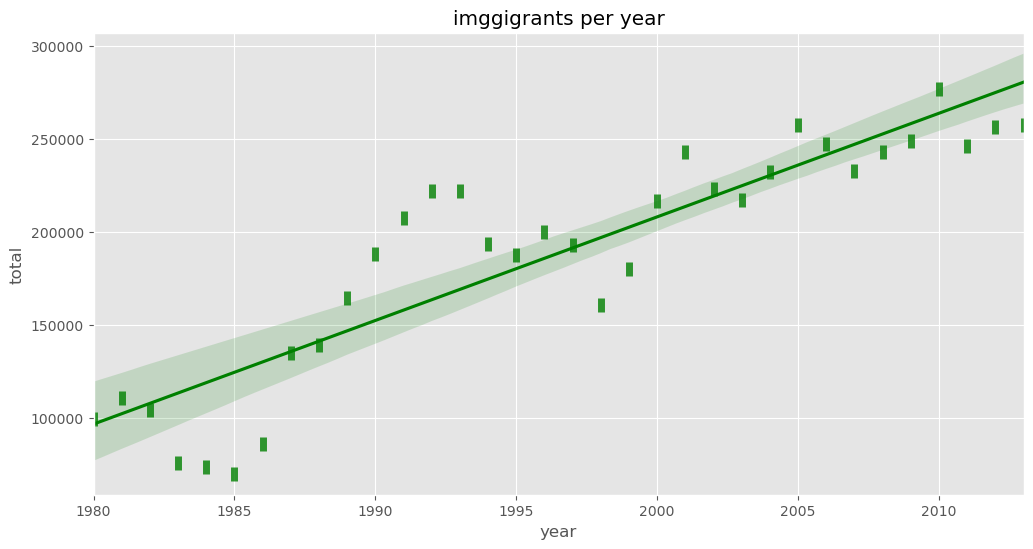

In [25]:
plt.style.use("ggplot")
plt.figure(figsize=(12, 6))
sns.regplot(x="year", y="total", data=df_total,
           color="green", marker='|', scatter_kws={"s": 100, "linewidth": 5}
           )
plt.title("imggigrants per year")
plt.show()

In [26]:
!pip install folium

In [27]:
folium.__version__

'0.11.0'

In [28]:
maps = folium.Map()
maps

In [29]:
Bandung = folium.Map(location=(-6.9174639, 107.6191228), zoom_start=13, tiles="Stamen Toner")
Bandung

In [30]:
sf_incidents = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/Police_Department_Incidents_-_Previous_Year__2016_.csv')

In [31]:
subset_sf_incidents = sf_incidents.loc[:100]
subset_sf_incidents

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,160015163,NON-CRIMINAL,AIDED CASE,Wednesday,01/06/2016 12:00:00 AM,16:09,MISSION,NONE,14TH ST / FOLSOM ST,-122.415616,37.768536,"(37.7685360123583, -122.41561633832)",16001516351040
97,160015276,BURGLARY,"BURGLARY, UNLAWFUL ENTRY",Tuesday,01/05/2016 12:00:00 AM,20:00,PARK,NONE,1000 Block of COLE ST,-122.449752,37.764430,"(37.7644297714074, -122.449751652563)",16001527605073
98,160015276,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Tuesday,01/05/2016 12:00:00 AM,20:00,PARK,NONE,1000 Block of COLE ST,-122.449752,37.764430,"(37.7644297714074, -122.449751652563)",16001527606224
99,160015282,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,01/05/2016 12:00:00 AM,17:00,TARAVAL,NONE,0 Block of ARDENWOOD WY,-122.472716,37.735268,"(37.7352681469084, -122.472715759631)",16001528206244


In [32]:
sf_lat = 37.77
sf_lang = -122.42

sf_map= folium.Map(location=(sf_lat, sf_lang), zoom_start=12)
sf_map

In [33]:
sf_incidents

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150495,161061000,ASSAULT,BATTERY,Friday,12/30/2016 12:00:00 AM,21:01,PARK,NONE,OAK ST / STANYAN ST,-122.453982,37.771428,"(37.7714278595913, -122.453981622365)",16106100004134
150496,176000742,NON-CRIMINAL,LOST PROPERTY,Friday,12/30/2016 12:00:00 AM,08:00,CENTRAL,NONE,JACKSON ST / SANSOME ST,-122.401857,37.796626,"(37.7966261239618, -122.401857374739)",17600074271000
150497,176000758,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Thursday,12/29/2016 12:00:00 AM,20:00,CENTRAL,NONE,PINE ST / TAYLOR ST,-122.412269,37.790673,"(37.7906727649886, -122.41226909106)",17600075806372
150498,176000764,LARCENY/THEFT,GRAND THEFT OF PROPERTY,Friday,12/30/2016 12:00:00 AM,10:00,CENTRAL,NONE,200 Block of STOCKTON ST,-122.406659,37.788275,"(37.7882745285785, -122.406658711008)",17600076406374


In [34]:
incidents = folium.map.FeatureGroup()

for lat, long in zip(subset_sf_incidents.Y, subset_sf_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            location=(lat, long),
            radius=5,
            color="yellow",
            fill=True,
            fill_color="blue",
            fill_opacity=0.6
        )
    )

labels = sf_incidents.Category.tolist()
for lat, long, label in zip(subset_sf_incidents.Y, subset_sf_incidents.X, labels):
    folium.Marker((lat, long), popup=label).add_to(sf_map)

sf_map.add_child(incidents)

In [35]:
sf_map = folium.Map((sf_lat, sf_long), zoom_start=12)
incidents = folium.plugins.MarkerCluster().add_to(sf_map)

for lat, long, label in zip (subset_sf_incidents.Y, subset_sf_incidents.X, labels):
    folium.Marker(
        location=(lat, long),
        icon=None,
        popup=label,
        ).add_to(incidents)
sf_map

NameError: name 'sf_long' is not defined